In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv('Avacado.csv')
df

,I,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [7]:
#checking the datatype of each column 
print(df.dtypes)
# All features are of integer except ERA which is float
print(df.info())

I                 int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   I             1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non

In [8]:
df.drop(columns=["I"],inplace=True)

In [9]:
df.shape

(1517, 13)

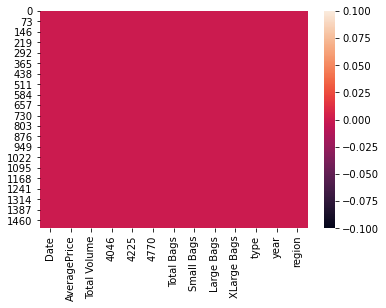

In [10]:
#checking null values using heat map
sns.heatmap(df.isnull())
#we can see that their is no null values

In [11]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [12]:
#Using Label Encoder to convert all categorial data into numbers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['type','region','year']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

In [13]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int32
region            int32
dtype: object

# Univariate Analysis

AveragePrice       AxesSubplot(0.125,0.657941;0.0945122x0.222059)
Total Volume    AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
4046            AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
4225            AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
4770            AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
Total Bags      AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
Small Bags      AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
Large Bags         AxesSubplot(0.125,0.391471;0.0945122x0.222059)
XLarge Bags     AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
type            AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
year            AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
region          AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
dtype: object

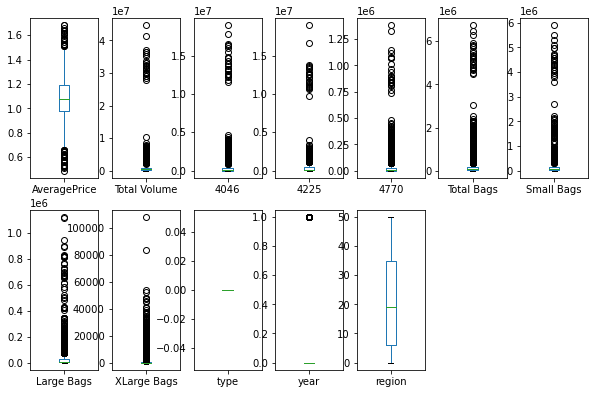

In [14]:
#from below observation we can say lots of outliers are present in the data set
df.plot(kind='box',subplots=True,layout=(3,7),figsize=(10,10))

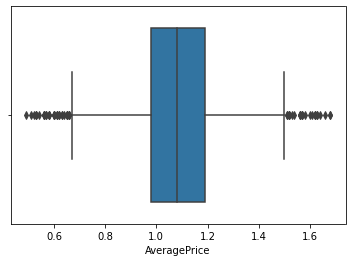

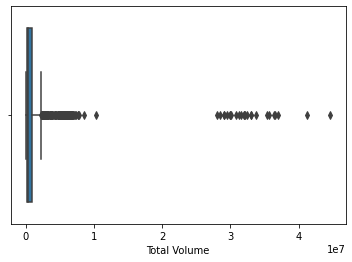

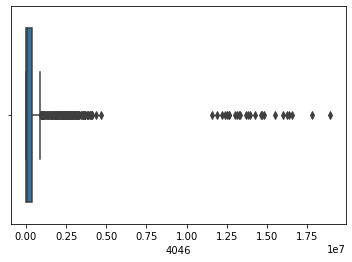

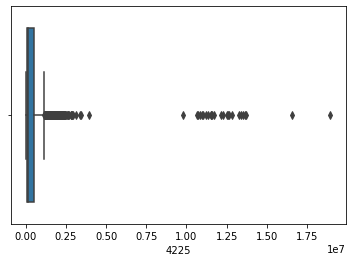

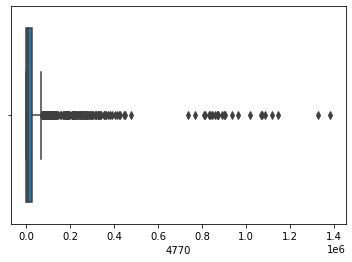

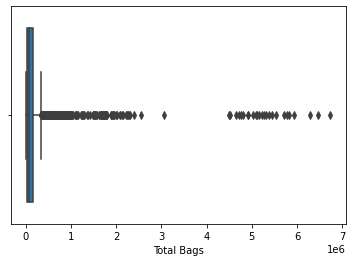

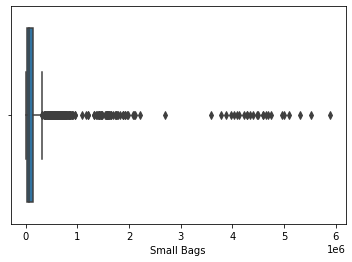

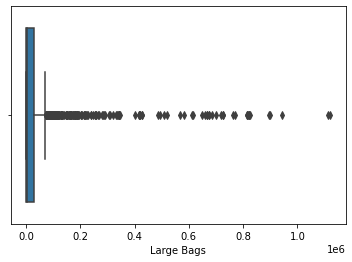

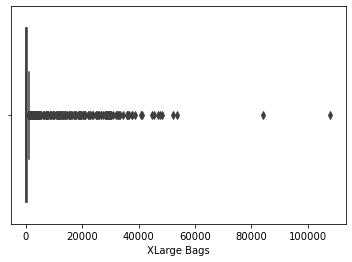

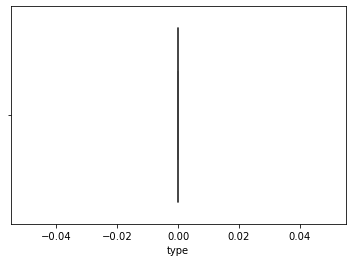

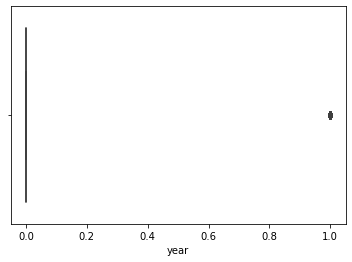

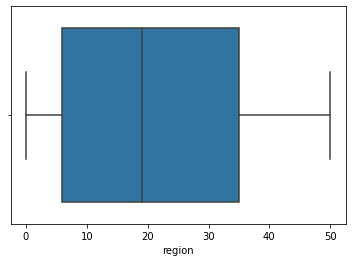

In [15]:
# Cheacking whether the columns has outliers or not
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()


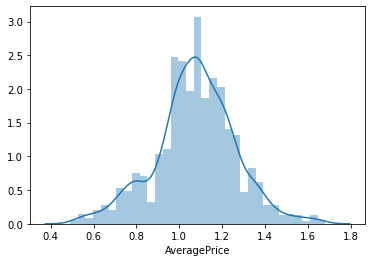

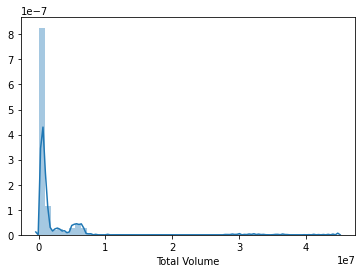

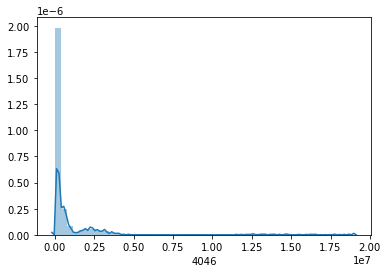

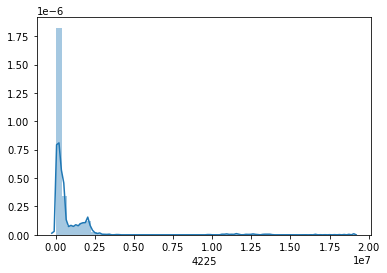

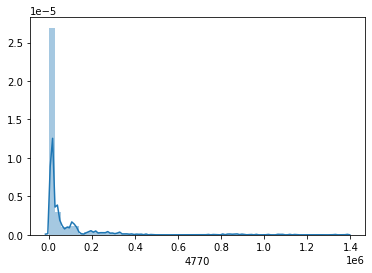

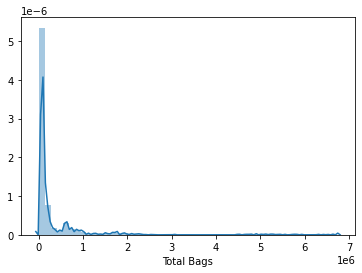

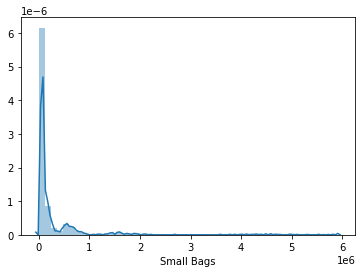

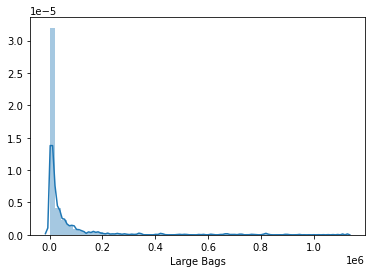

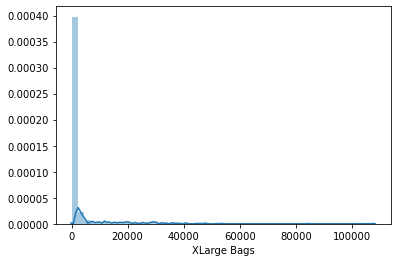

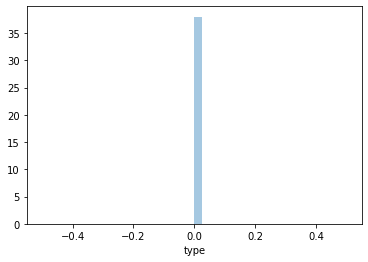

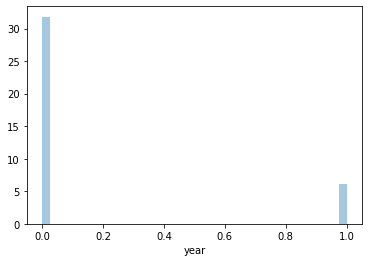

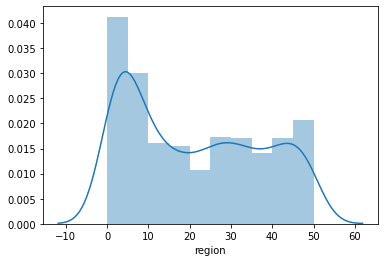

In [16]:
#checking wheather the columns are normally distributed or not

for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020692A07940>,
      dtype=object)

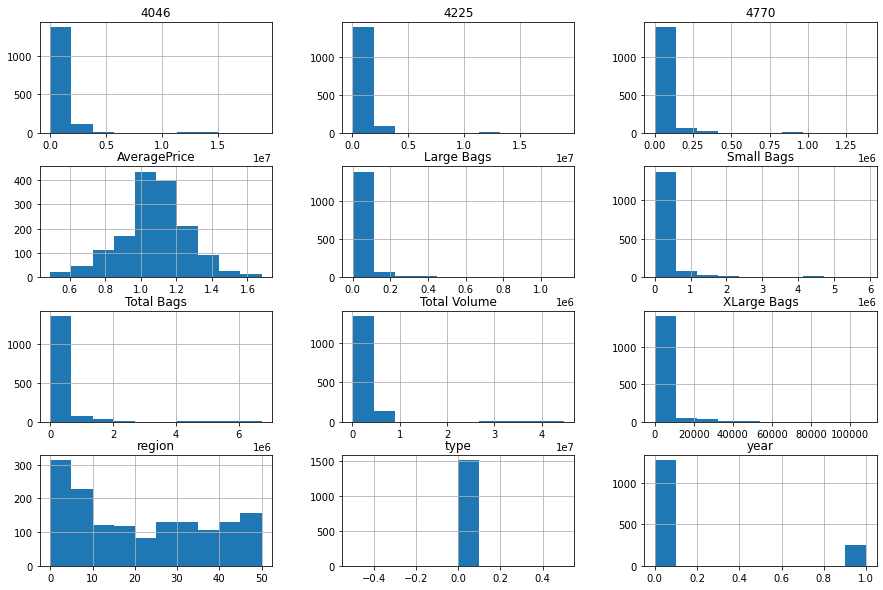

In [17]:
df.hist(figsize=(15,10),bins=10)

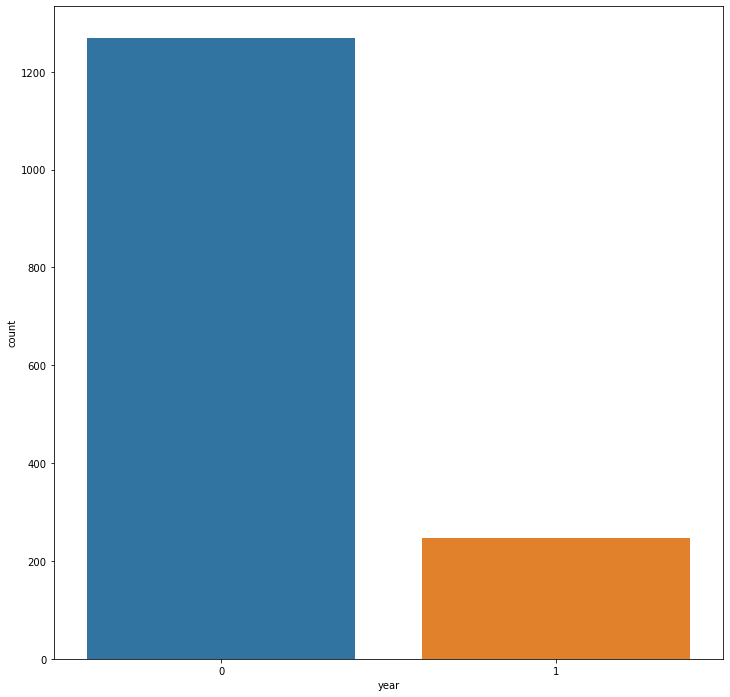

In [18]:
plt.figure(figsize=[12,12])
sns.countplot(x = 'year', data = df)

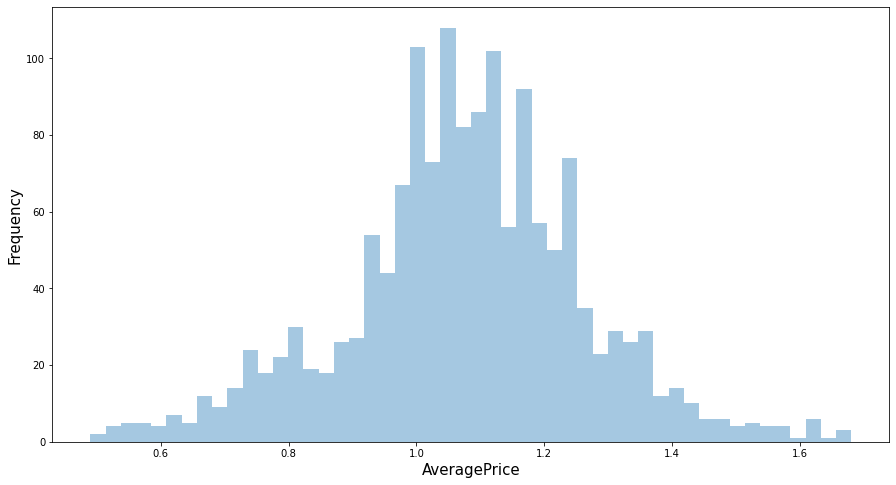

In [19]:
plt.figure(figsize=(15,8))
sns.distplot(df["AveragePrice"],bins=50,kde=False )
plt.xlabel("AveragePrice", Size=15)
plt.ylabel("Frequency", Size=15)
plt.show()

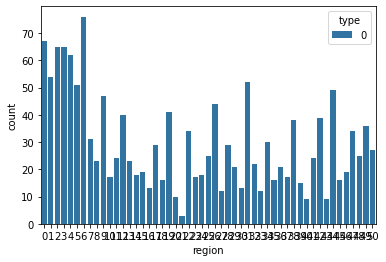

In [20]:
sns.countplot(x='region',hue='type',data=df)

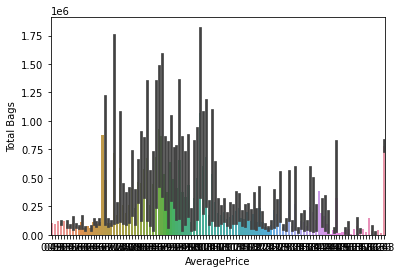

In [21]:
sns.barplot(x='AveragePrice',y='Total Bags',data=df)

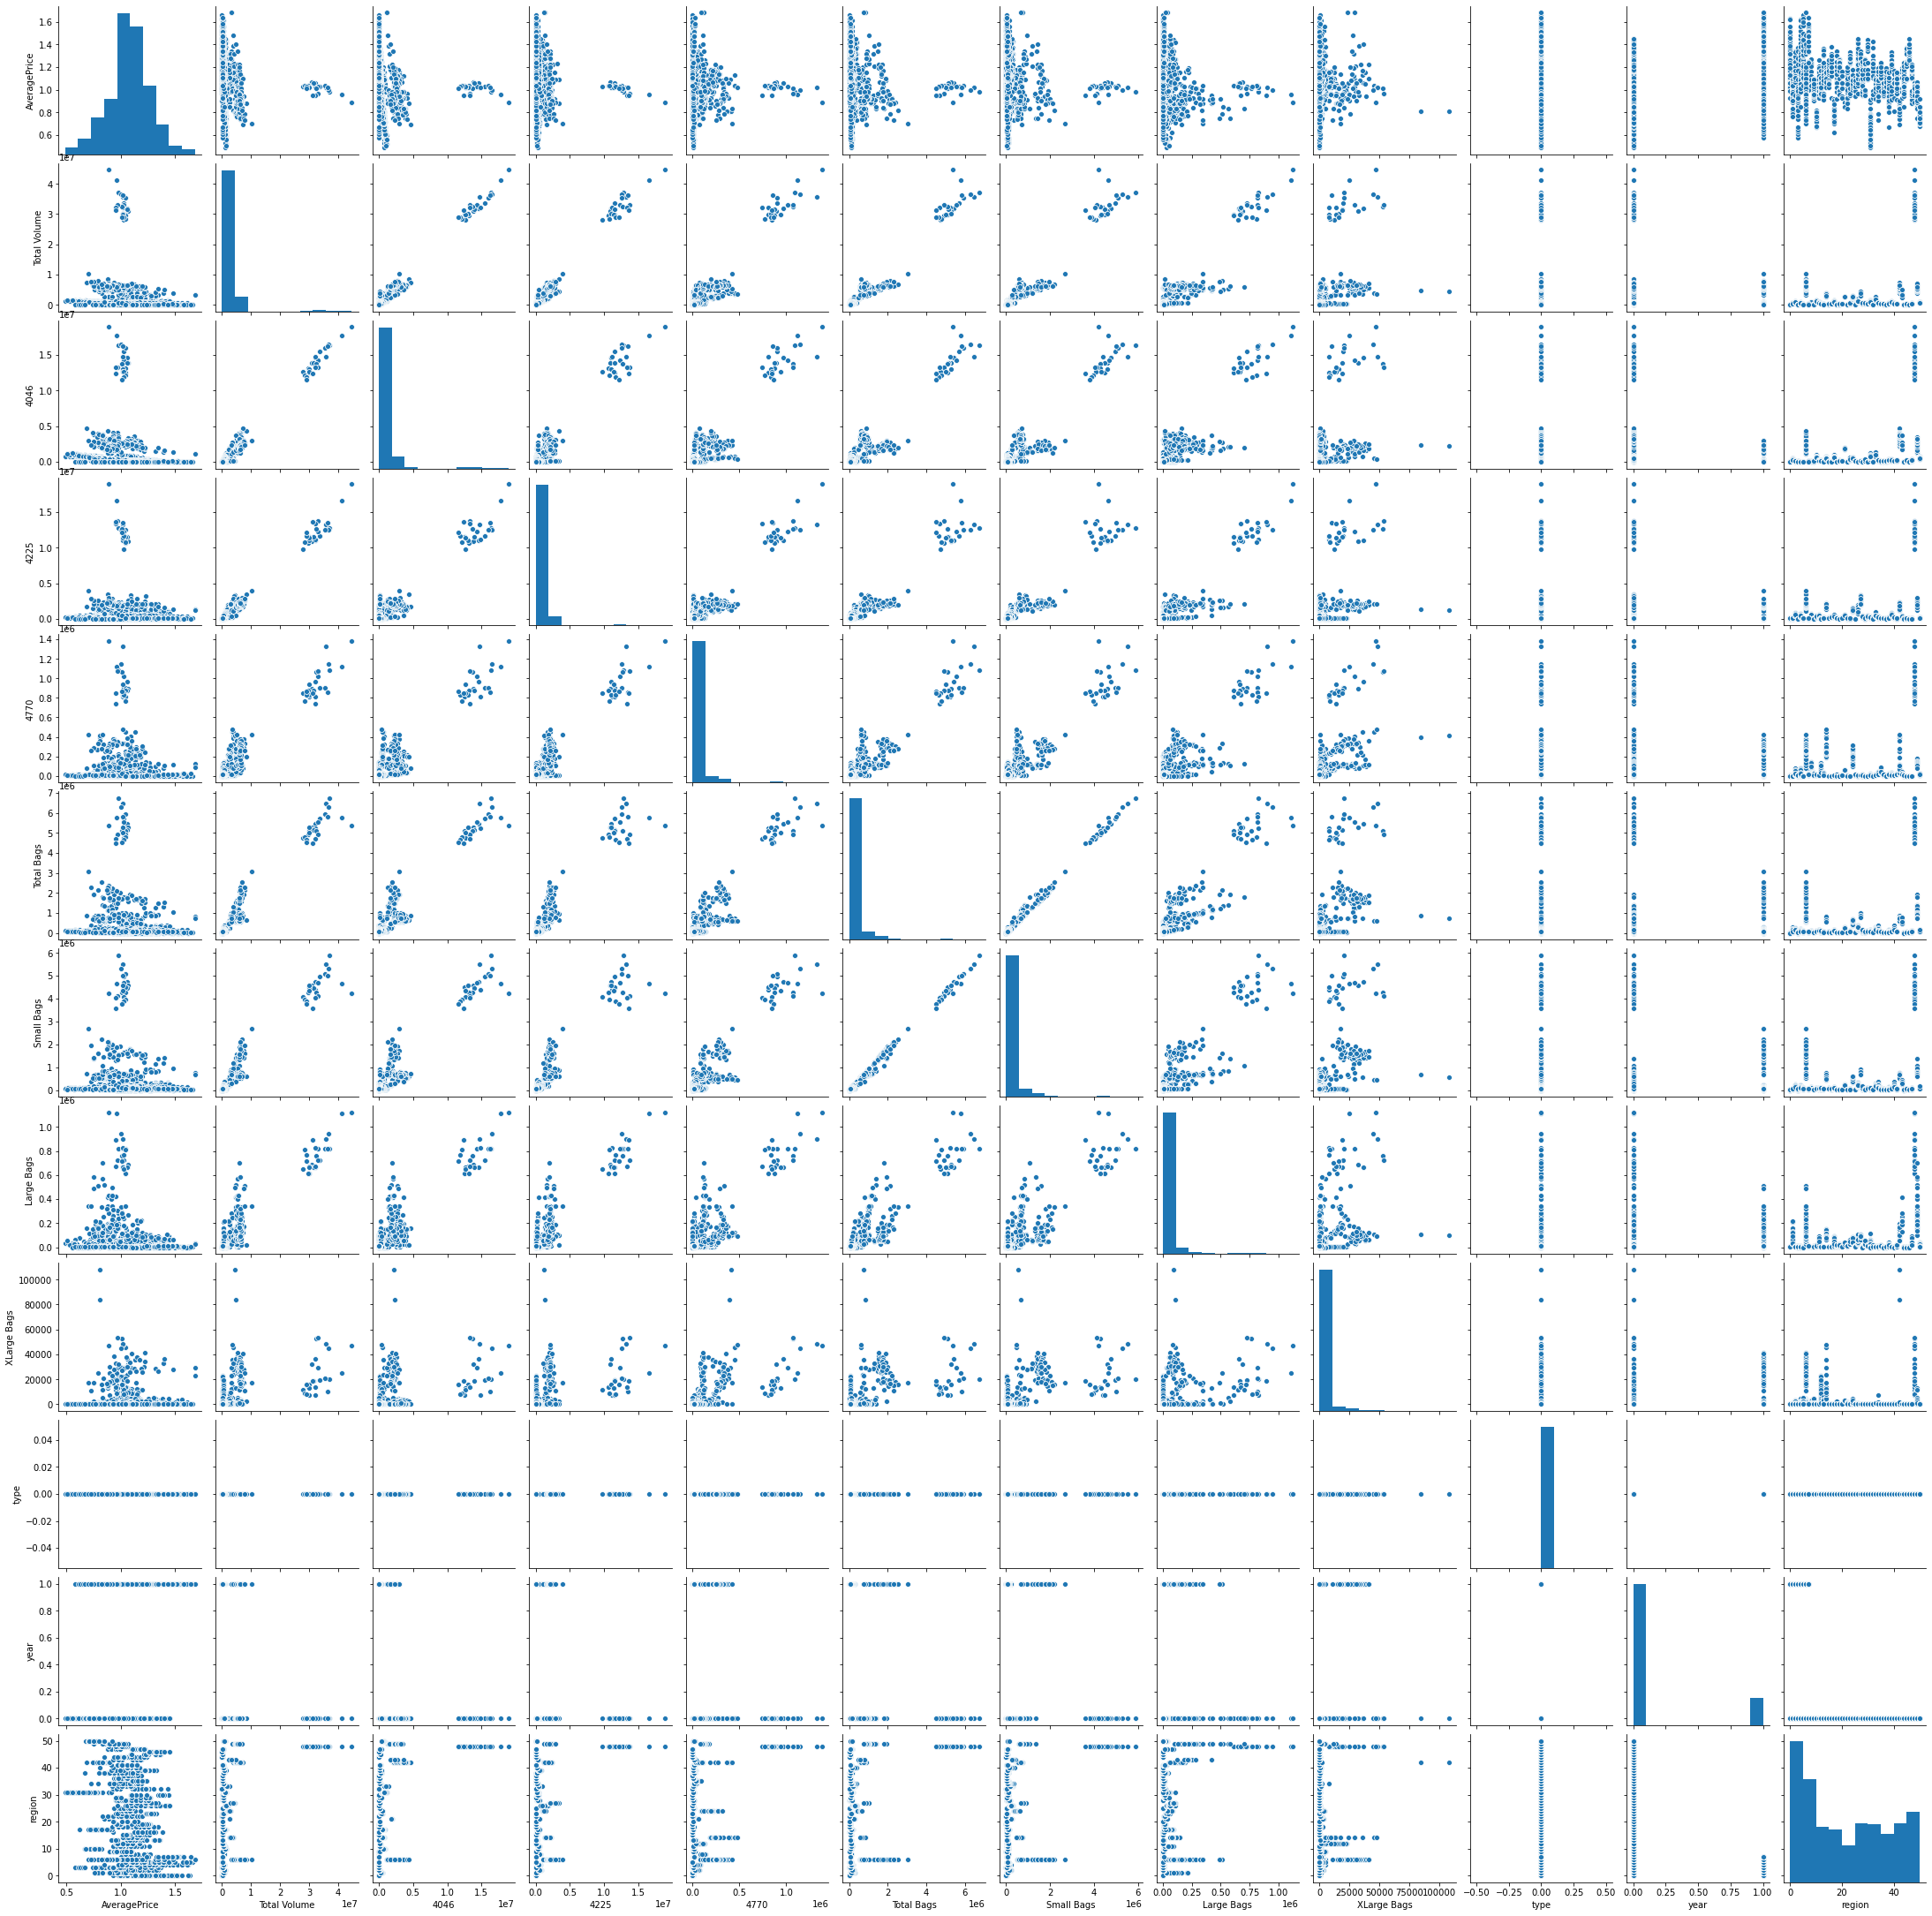

In [22]:
sns.pairplot(df)

# Statistical Analysis

In [23]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,0.162821,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,0.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,0.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,0.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,0.000000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,1.000000,50.000000


<function matplotlib.pyplot.show(*args, **kw)>

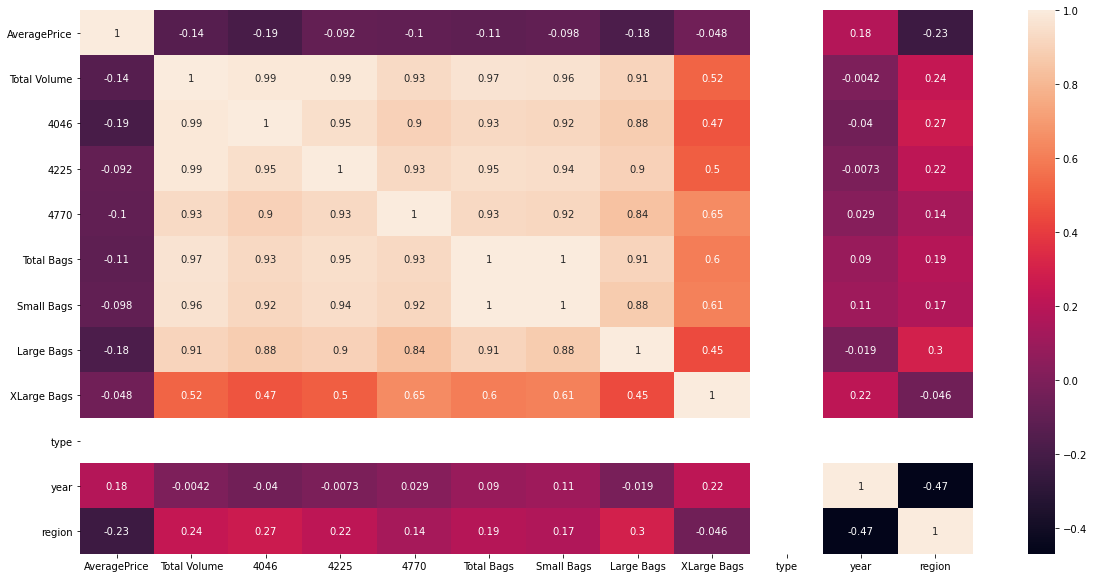

In [24]:
#Observing corelation between the columns through heatmap
##We observe positive correlation between AveragePrice and year only rest are negatively corelated

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show

In [25]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,0.236579
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,0.218342,-0.046144
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0,0
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,1,7
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,1,7
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,1,7
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,1,7


In [27]:
#Dropping date column 
df.drop(columns=["Date"],inplace=True)

In [28]:
#Using Label Encoder to convert all categorial data into numbers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['type','region','year']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

In [29]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0


In [30]:
#calculating Z score
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.35048079, 0.34696593, 0.33149016, ...,        nan, 0.44100815,
        1.63524905],
       [1.45639674, 0.34907791, 0.33167633, ...,        nan, 0.44100815,
        1.63524905],
       [0.76783831, 0.33478463, 0.33161448, ...,        nan, 0.44100815,
        1.63524905],
       ...,
       [2.14485045, 0.32120275, 0.30820887, ...,        nan, 2.26753179,
        1.41577447],
       [2.09189247, 0.31878364, 0.30423037, ...,        nan, 2.26753179,
        1.41577447],
       [1.88006056, 0.3201721 , 0.30987728, ...,        nan, 2.26753179,
        1.41577447]])

# Splitting the data into input and target

In [31]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

In [32]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0


In [33]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [34]:
print(x.shape)
print(y.shape)

(1517, 11)
(1517,)


In [35]:
y=y.values.reshape(-1,1)

In [36]:
y.shape

(1517, 1)

In [37]:
#Reducing skewness of the data set
for i in x.columns:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [38]:
x.skew()

Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
region         -0.089741
dtype: float64

# Importing Necessary Libraries

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [40]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [41]:
lreg=LinearRegression()
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 89 is 0.45752309544518344


In [42]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=3,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=3,scoring="r2").std())


Mean r2 score for Linear Regression: 0.16963943015613084
standard deviation in r2 score for Linear Regression 0.08643934530983227


In [43]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':(3,4,5,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

enr=ElasticNet()
parametors={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parametors,cv=5)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 10}


{'alpha': 0.01}


{'criterion': 'friedman_mse'}




{'alpha': 0.1}

In [58]:
knn=KNeighborsRegressor(n_neighbors=10)
i=maxr2_score(knn,x,y)
print("\n")

print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")

lsreg=Lasso(alpha=0.01)
i=maxr2_score(lsreg,x,y)
print("\n")

print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")


dtr=DecisionTreeRegressor(criterion = 'friedman_mse')
i=maxr2_score(dtr,x,y)
print("\n")

print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")

enr=ElasticNet(alpha=0.1)
i=maxr2_score(enr,x,y)
print("\n")

print("Mean r2 score for Elastic net Regression:",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Elastic net Regression",cross_val_score(enr,x,y,cv=5,scoring="r2").std())


max r2 score corresponding to 92 is 0.7592251960669562


Mean r2 score for KNeighbor  Regression: -0.7783956810252485
standard deviation in r2 score for KNeighbor   Regression 1.2183727757019471

___________________________________________________________________________________________________________

max r2 score corresponding to 99 is 0.3705437466053013


Mean r2 score for Lasso Regression: 0.19391366525524942
standard deviation in r2 score for Lasso Regression 0.11522979966395837

___________________________________________________________________________________________________________

max r2 score corresponding to 94 is 0.7615990108365291


Mean r2 score for DecisionTreeRegressor : -1.1071130535943832
standard deviation in r2 score for DecisionTreeRegressor 1.6798505444227037

_____________________________________________________________________________________________________________

max r2 score corresponding to 80 is 0.2943724454006166


Mean r2 score for Elastic net Regres

In [45]:
rfr=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
clf=GridSearchCV(rfr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'max_features': 'log2', 'n_estimators': 100}

In [59]:
rfr=RandomForestRegressor(max_features='log2',n_estimators=100)
i=maxr2_score(rfr,x,y)

max r2 score corresponding to 60 is 0.8671455321710674


In [60]:
print("Mean r2 score for RandomForestRegressor :",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())

Mean r2 score for RandomForestRegressor : 0.071362731590531
standard deviation in r2 score for RandomForestRegressor  0.4751513176204527


In [48]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x,y)
    print(sv.score(x,y))

0.37824195841357955
0.47925406336164655
0.4662881850203697


In [49]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,20,50,100]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [50]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=20)
i=maxr2_score(gbr,x,y)

max r2 score corresponding to 47 is 0.6432918138735455


In [51]:
print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting Regression: 0.1374087004665359
standard deviation in r2 score for gradient boosting Regression 0.4472874157707319


In [52]:
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,20,30,50],"base_estimator":[lreg,lsreg,dtr,rfr,enr]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': Lasso(alpha=0.1), 'learning_rate': 0.1, 'n_estimators': 50}

In [63]:
ada_reg=AdaBoostRegressor(Lasso(alpha=0.1),learning_rate=0.1,n_estimators=50)
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 89 is 0.45752309544518344


In [65]:
print("Mean r2 score for ada boosting Regression:",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for ada boosting Regression",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression: 0.22247175531659408
standard deviation in r2 score for ada boosting Regression 0.1019000496693022


# From the above analysis w.r.t r2_score RandomForest Regressor is performing best

In [66]:
#From the above analysis w.r.t r2_score Random Forest Regressor is performing best
#So we will choose ElasticNet Regressor
#max r2_score is acived at random state 46
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= 60 ,test_size=0.20)
rfr=RandomForestRegressor()
rfr.fit(x,y)
y_pred=rfr.predict(x_test)
y_pred

array([1.048 , 1.0953, 1.1193, 1.2636, 1.1642, 0.8967, 0.9649, 0.623 ,
       1.1661, 1.0547, 1.0981, 1.24  , 1.1653, 1.265 , 1.0913, 1.6121,
       1.34  , 1.0021, 0.634 , 0.9915, 0.5617, 1.1535, 1.5866, 1.4841,
       1.4387, 1.1454, 1.4429, 1.0966, 1.3539, 0.6542, 1.1163, 1.0461,
       0.8291, 0.992 , 1.0894, 1.1602, 1.2739, 1.1045, 1.1232, 1.0077,
       1.0828, 1.1638, 0.9563, 1.1207, 0.6707, 1.0398, 0.9828, 1.0126,
       1.093 , 1.1585, 0.8005, 1.0551, 0.9241, 1.3438, 0.7638, 1.3553,
       1.2906, 1.4117, 1.2764, 1.1481, 1.0057, 1.0043, 1.2216, 1.1508,
       0.9711, 1.1763, 1.336 , 0.8246, 1.1136, 1.1408, 1.3366, 0.6623,
       1.1739, 1.0359, 0.8999, 1.1982, 1.0867, 1.0639, 0.8806, 1.1042,
       1.4573, 0.5468, 0.7547, 0.7811, 1.1997, 0.8337, 1.0252, 1.0859,
       1.1641, 1.454 , 1.1871, 1.3647, 1.1239, 1.2721, 1.0852, 1.0099,
       1.0899, 1.1232, 1.0478, 1.1105, 1.1432, 1.2309, 0.7426, 1.0761,
       0.7636, 0.8174, 1.2947, 1.0876, 1.1299, 1.2408, 1.1384, 1.3065,
      

In [67]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  0.027829724855382886
r2_score is: 0.9818281268739786


In [68]:
import joblib
joblib.dump(rfr,"Avacado.pkl")

['Avacado.pkl']